In [1]:
# import os
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

# #####################################
###### Not ncessary anymore, was to set the backend to cpu manually
# import few
# cfg_set = few.get_config_setter(reset=True)
# # cfg_set.enable_backends("cpu")
####################################
import few
for backend in ["cpu", "cuda11x", "cuda12x", "cuda", "gpu"]:
    # print(f" - Backend '{backend}': {"available" if few.has_backend(backend) else "unavailable"}")
    print(f" - Backend '{backend}': {'available' if few.has_backend(backend) else 'unavailable'}") ## for older python versions


 - Backend 'cpu': available
 - Backend 'cuda11x': unavailable
 - Backend 'cuda12x': available
 - Backend 'cuda': available
 - Backend 'gpu': available


In [2]:

from bhpwave.waveform import KerrWaveform
from bhpwave.harmonics.amplitudes import HarmonicAmplitudes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator
import os


from few.utils.geodesic import get_separatrix



# Have to install BhpWave first
amp_BHPWave = HarmonicAmplitudes()


#### for the local version
from few.amplitude.ampinterp2d import AmpInterpKerrEccEq
amp_Kerr_ecc = AmpInterpKerrEccEq()

##### For the pip version
# from few.amplitude.ampinterp2d import AmpInterpKerrEqEcc
# amp_Kerr_ecc = AmpInterpKerrEqEcc()

latex_setting = {'text.usetex': True,
        'font.family': 'serif',
        'font.serif': 'cmr10',
        'font.weight':'medium',
        'mathtext.fontset': 'cm',
        'text.latex.preamble': r"\usepackage{amsmath}",
        # 'font.size': 14,
        # 'figure.figsize': (7, 7),
        # 'figure.titlesize': 'large',
        'axes.formatter.use_mathtext': True,
        # 'axes.formatter.limits': [-2, 4],
        # 'axes.titlesize': 'large',
        # 'axes.labelsize': 'large',
        'xtick.top': True,
        # 'xtick.major.size': 5,
        # 'xtick.minor.size': 3,
        # 'xtick.major.width': 0.8,
        # 'xtick.minor.visible': True,
        'xtick.direction': 'in',
        # 'xtick.labelsize': 'medium',
        'ytick.right': True,
        # 'ytick.major.size': 5,
        # 'ytick.minor.size': 3,
        # 'ytick.major.width': 0.8,
        # 'ytick.minor.visible': True,
        'ytick.direction': 'in',
        # 'ytick.labelsize': 'medium',
        # 'legend.frameon': True,
        # 'legend.framealpha': 1,
        # 'legend.fontsize': 'medium',
        # 'legend.scatterpoints' : 3,
        #'lines.color': 'k',
        # 'lines.linewidth': 2,
        # 'patch.linewidth': 1,
        # 'hatch.linewidth': 1,
        # 'grid.linestyle': 'dashed',
        'grid.linewidth' : 0.3,
        # 'savefig.dpi' : 200,
        # 'savefig.format' : 'pdf',
        # 'savefig.bbox' : 'tight',
        'savefig.transparent' : True,
    }
plt.rcParams.update(latex_setting)


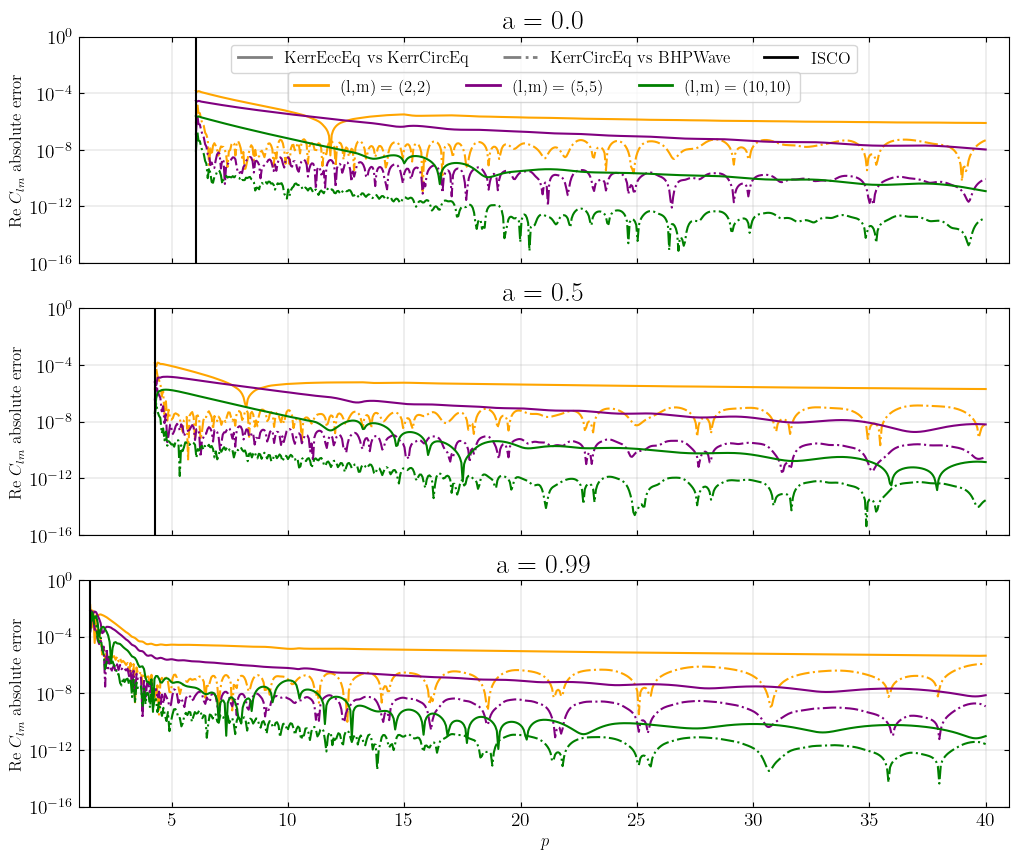

In [3]:
path = os.getcwd() + '/'#"/home/hkhalvati/Downloads/KerrEccentricEquatorialFigures/scripts/Results/Cross_tests/"
title_fontsize = 20
label_fontsize = 12
tick_fontsize = 14
legend_fontsize = 12
text_fontsize = 12


ecc = 0.0
xI = 1.0
e = np.array([ecc])
xI = np.array([xI])

####### Loading the saved data from KerrCir version of FEW ---> https://github.com/Hassankh92/FastEMRIWaveforms_KerrCircNonvac
###### Download the data from :
#  https://perimeter-my.sharepoint.com/:f:/g/personal/hkhalvati_perimeterinstitute_ca/EpClG00fwZVNsch7WU2OrGQBdtY8cctLCEdKmemo2S7fZw?e=KbP3cX
KerrCirc_data =  np.loadtxt(path + "Amplitudes_KerrCirc.txt")
l_KerrCirc = KerrCirc_data[:,0]
m_KerrCirc = KerrCirc_data[:,1]
a_KerrCirc = KerrCirc_data[:,2]
p_KerrCirc = KerrCirc_data[:,3]
C_real_KerrCirc = KerrCirc_data[:,4]
C_imag_KerrCirc = KerrCirc_data[:,5]


a_arr = [0.0, 0.5, 0.99] #np.unique(a_KerrCirc)[::2]
lm_list = [(2,2),(5,5),(10,10)]

# c = ["k", "r", "b","orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]
c = ["orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]




fig, ax = plt.subplots(len(a_arr), 1, figsize=(12, 10))
# plt.figure(figsize = (12,6.5))

for i,a in enumerate(a_arr):
    mask_H = (a_KerrCirc == a)
    p = np.unique(p_KerrCirc[mask_H])
    ps = np.min(p)
    # ps = get_separatrix(a,e, x)
    # p = np.linspace(ps+0.0305, 40.0, 600)
    a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
    teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all,  xI_all)
    for jj, (l,m) in enumerate(lm_list):
        modes_Kerr = teuk_modes_Kerr[:, amp_Kerr_ecc.special_index_map[(l,m,0)]] #Kerr case
        modes_Kerr = modes_Kerr.get()  ##### Uncomment this line if you are using GPU
        zach_modes_Kerr = amp_BHPWave(l,m,a_all,p_all)


        # mask Has's data from the saved file
        mask = (l_KerrCirc == l) & (m_KerrCirc == m) & (a_KerrCirc == a)
        modes_KerrCirc = (C_real_KerrCirc[mask] + 1j*C_imag_KerrCirc[mask])


        modes_KerrCirc = modes_KerrCirc.real
        modes_Kerr = modes_Kerr.real
        zach_modes_Kerr = zach_modes_Kerr.real


        frac_err_KerrEcc_KerrCirc = abs((modes_KerrCirc - modes_Kerr))# / modes_Kerr)
        frac_err_KerrCirc_BHPWave = abs((modes_KerrCirc - zach_modes_Kerr))# / modes_KerrCirc)
        frac_err_KerrEcc_BHPWave = abs((zach_modes_Kerr - modes_Kerr))# / modes_Kerr)
        n_skip = 1
        ax[i].plot(p_all[::n_skip],frac_err_KerrEcc_KerrCirc[::n_skip], '-', color = c[jj], label = f"$l,m:({l},{m})$, KerrEccEq vs KerrCircEq", rasterized = True)# and a = {a}")
        # ax[i].plot(p_all[::n_skip],frac_err_KerrEcc_BHPWave[::n_skip],marker='*', linestyle='None', markerfacecolor='none', color = c[j], label = f"$l,m:({l},{m})$, KerrEccEq vs BHPWave")# and a = {a}")
        ax[i].plot(p_all[::n_skip],frac_err_KerrCirc_BHPWave[::n_skip], '-.', color = c[jj], label = f"$l,m:({l},{m})$, KerrCircEq vs BHPWave", rasterized = True)# and a = {a}")

    ax[i].axvline(ps, color = 'k' ,label=f"ISCO")
    ax[i].set_yscale("log")   
    ax[i].set_ylabel(r"$ \mathrm{Re} \ C_{lm}$ absolute error", fontsize = label_fontsize)
    ax[i].set_title(f"a = {a}", fontsize = title_fontsize)
    ax[i].set_xlim(1,41)
    ax[i].set_ylim(1e-16,1e0)
    ax[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax[i].grid()
    # ax[i].legend(loc = "upper right",fontsize = legend_fontsize)


ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[-1].set_xlabel("$p$", fontsize = label_fontsize)


style_lines = [
    Line2D([0], [0], color="gray", linestyle="-", lw=2, label="KerrEccEq vs KerrCircEq"),
    Line2D([0], [0], color="gray", linestyle="-.", lw=2, label="KerrCircEq vs BHPWave"),
    Line2D([0], [0], color="k", linestyle="-", lw=2, label="ISCO"),
]

mode_lines = [ 
    Line2D([0], [0], color=c[0], lw=2, label="(l,m) = (2,2)"),
    Line2D([0], [0], color=c[1], lw=2, label="(l,m) = (5,5)"),
    Line2D([0], [0], color=c[2], lw=2, label="(l,m) = (10,10)")
]

# ax[0].legend(handles=custom_lines, ncol = 3, loc="upper right", fontsize=legend_fontsize)

leg1 = ax[0].legend(handles=style_lines, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize=legend_fontsize)
leg2 = ax[0].legend(handles=mode_lines, loc='upper center', bbox_to_anchor=(0.5, 0.88), ncol=3, fontsize=legend_fontsize)
ax[0].add_artist(leg1)







# plt.savefig(path + f"amp_err.pdf", transparent=False)



(array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03]),
 [Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 9.999999999999999e-10, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

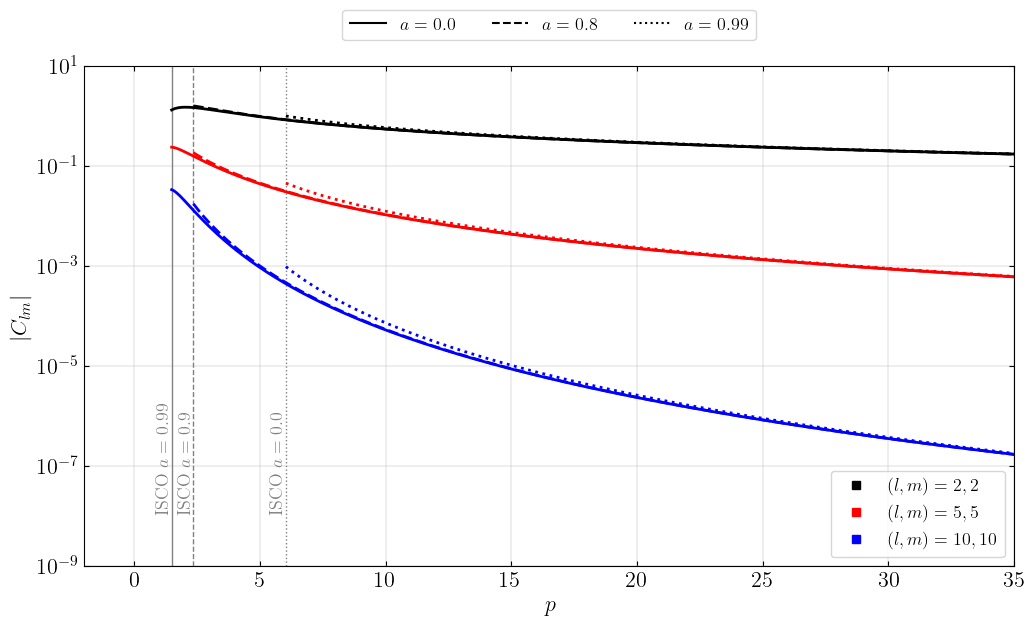

In [4]:
path = os.getcwd() + '/'#"/home/hkhalvati/Downloads/KerrEccentricEquatorialFigures/scripts/Results/Cross_tests/"
import matplotlib.lines as mlines

tick_size = 16
label_size = 16
legend_size = 13
# title_size = 20
plunge_label_size = 10  # Example for custom plunge limit label
thick_isco = 1
thick_plots = 2

a, p, e, x, nsamples = (0.0, 10.0, 0.0, 1.0, 2**8)
# p = 6.1
# a0 = np.linspace(0.0, 99.0)

a0 = np.array([a])
# p = np.array([p])
e = np.array([e])
xI = np.array([x])





a0 = [0.0,0.9,0.99]
lm_list = [(2,2),(5,5),(10,10)]


s = [":", "--", "-"]
# c = ["k", 'r', 'b']
c = ["k", "r", "b","orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]



KerrCirc_data =  np.loadtxt(path + "Amplitudes_KerrCirc_full.txt")
l_Has = KerrCirc_data[:,0]
m_Has = KerrCirc_data[:,1]
a_Has = KerrCirc_data[:,2]
p_Has = KerrCirc_data[:,3]
C_real_Has = KerrCirc_data[:,4]
C_imag_Has = KerrCirc_data[:,5]



thick_plots = 2
plt.figure(figsize = (12,6.5))
for i,a in enumerate(a0):
    # ps = get_separatrix(a,e, x)
    # p = np.linspace(ps+0.0305, 40.0, 600)
    mask_H = (a_KerrCirc == a)
    p = np.unique(p_KerrCirc[mask_H])
    ps = np.min(p)
    a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
    teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all,  xI_all)
    style = s[i]
    plt.axvline(ps ,linestyle=s[i],linewidth=thick_isco, color = 'grey' ,label=f"plunge limit p:{ps}")
    plt.text(ps, 1e-8, f"ISCO $a = {a}$", color='grey', fontsize=legend_size, verticalalignment='bottom', horizontalalignment='right', rotation=90)
    for j, (l,m) in enumerate(lm_list):
        modes_Kerr = teuk_modes_Kerr[:, amp_Kerr_ecc.special_index_map[(l,m,0)]] #Kerr case
        modes_Kerr = modes_Kerr.get()
        modes_Kerr = abs(modes_Kerr)
        plt.plot(p_all,modes_Kerr,s[i], color=c[j], linewidth = thick_plots,label=f"$a = {a}, l,m = {l},{m}$")
    

plt.yscale("log")
# plt.ylabel(r"$\mathrm{Re} \ C_{lm}$", fontsize=label_size)
plt.ylabel(r"$|C_{lm}|$", fontsize=label_size)
plt.xlabel("$p$", fontsize=label_size)
# plt.title("Amplitudes vs separation for different spin values", fontsize=title_size)
plt.xlim(-2, 35)
plt.ylim(1e-9, 1e1)
# plt.axhline(1e-7,0,35,linestyle="--",color="grey",linewidth=thick_isco)
plt.grid()




handles2 = []
for color,(l,m) in zip(c, lm_list):
    handles2.append(mlines.Line2D([], [],color=color, linestyle='None', marker = 's', label=f'$(l,m)={l},{m}$'))
legend2 = plt.legend(handles=handles2, loc='lower right', fontsize=legend_size)
# legend2 = plt.legend(handles=handles2, loc='center right', fontsize=legend_size, ncols=len(lm_list), bbox_to_anchor=(0.0, 1.09))
plt.gca().add_artist(legend2)


handles = [plt.Line2D([0], [0], color='k', linestyle='-', label='$a = 0.0$'),
           plt.Line2D([0], [0], color='k', linestyle='--', label='$a = 0.8$'),
           plt.Line2D([0], [0], color='k', linestyle=':', label='$a = 0.99$')]
# legend = plt.legend(handles=handles, loc='upper right',fontsize=legend_size)
legend = plt.legend(handles=handles, loc='upper center',fontsize=legend_size,ncols=len(a0), bbox_to_anchor=(0.5, 1.13))#,bbox_transform=plt.gcf().transFigure)
# legend2 = axs.legend(handles=handles, loc='upper left', fontsize=14, scatterpoints=1, ncols=len(mus), bbox_to_anchor=(0.0, 1.09))
# legend = plt.legend(handles=handles, loc='center right', fontsize=legend_size, ncols=len(lm_list), bbox_to_anchor=(0.0, 1.09))





plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# plt.savefig("KerrEccEq_Amplitudes.pdf")


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.trajectory.inspiral import EMRIInspiral
from few.trajectory.ode import KerrEccEqFlux, SchwarzEccFlux
from few.utils.utility import get_p_at_t
from few.utils.constants import MTSUN_SI, YRSID_SI
from numpy import pi
import os

from bhpwave.waveform import KerrWaveform
from  bhpwave.trajectory.inspiral import InspiralGenerator


import multiprocessing
num_threads = multiprocessing.cpu_count()
from  bhpwave.trajectory.inspiral import InspiralGenerator
traj_BHPWave = InspiralGenerator(trajectory_data=None)
# traj_l30_Has = EMRIInspiral(func="Relativistic_Kerr_Circ_Flux") # my flux and lmax = 30
traj_few = EMRIInspiral(func = SchwarzEccFlux, integrate_constants_of_motion=False) 
traj_Kerr_ecc = EMRIInspiral(func= KerrEccEqFlux, integrate_constants_of_motion=False) 

In [179]:
M = 1e6
mu = 1e1
a = 0.0    # non-rotating case
dt = 1.0
dtz = 40.0 # this is to have less number of point for Zach's traj
T = 4.0
e0 = 0.0
Y0 = 1.0
x0 = 1.0

# nu = M*mu/(M+mu)**2
# q = mu/M
# # time_rescaling = (nu/(M) / q*M)
# time_rescaling = 1/(nu/(mu+M) * M/q)
# phase_rescaling = (nu/q)


n_points_interp = 500

####### Loading the saved data from KerrCir version of FEW ---> https://github.com/Hassankh92/FastEMRIWaveforms_KerrCircNonvac
###### Download the data from :
#  https://perimeter-my.sharepoint.com/:f:/g/personal/hkhalvati_perimeterinstitute_ca/EpClG00fwZVNsch7WU2OrGQBdtY8cctLCEdKmemo2S7fZw?e=KbP3cX
path = os.getcwd() + '/'#"/home/hkhalvati/Downloads/KerrEccentricEquatorialFigures/scripts/Results/Cross_tests/"
traj_KerrCirc_result = np.loadtxt(path + "Traj_KerrCirc_full_newmass.txt")
mask_traj_has = traj_KerrCirc_result[:,0] == a
# ah, th, ph, eh, xh, Phi_phih, Phi_thetah, Phi_rh = traj_KerrCirc_result[mask_traj_has]
th =  traj_KerrCirc_result[mask_traj_has][:,1]
ph =  traj_KerrCirc_result[mask_traj_has][:,2]
Phi_phih = traj_KerrCirc_result[mask_traj_has][:,3]
p0 = ph[0]
print(f"p0:{p0} for a = {a}")

# Zach_traj_resul = traj_BHPWave(M, mu, a, p0, dt=dtz, T=T, num_threads=num_threads)
Zach_traj_resul = traj_BHPWave(M+mu, (mu*M)/(mu + M), a, p0, dt=dtz, T=T, num_threads=num_threads)

Phi_phiZ = Zach_traj_resul.inspiral_data.phase 
tZ = Zach_traj_resul.inspiral_data.time 
pZ = Zach_traj_resul.inspiral_data.radius
# tz, pz, ez, xz, Phi_phiz, Phi_thetaz, Phi_rz = traj_l30_pybhpt(M,mu,a0,p0,e0,Y0,A0,nr0,T=T, dt=dt)



# -------- Notice that the trajectories are not in the coordinate time, so the t is t/M and to make it into sec we have to use t*M*MTSUN_SI--------------
result_kerr_ecc = traj_Kerr_ecc(M,mu,a,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5) ,err=1e-17)
Phi_phik = result_kerr_ecc[4] 
tk = result_kerr_ecc[0]  
pk = result_kerr_ecc[1]




### Schwarzchild case from the new style traj FEW
result_Fnew = traj_few(M,mu,a,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5),err=1e-17)
t_Fnew = result_Fnew[0] 
p_Fnew = result_Fnew[1] 
Phi_phi_Fnew = result_Fnew[4] 




print("min separations a=0 case, ph, pz, pfew_new, p_kerr", ph[-1], pZ[-1], p_Fnew[-1], pk[-1])





from bhpwave.constants import Modot_GC1_to_S
Mt2st_BHPWave = (M*Modot_GC1_to_S)
Mt2st_FEW = M*MTSUN_SI

print("mass in second from Zach: ", Mt2st_BHPWave,'\n', "mass in second from FEW: ", Mt2st_FEW,'\n', "fracional error of the two", (Mt2st_BHPWave-Mt2st_FEW)/Mt2st_FEW)



splineh = CubicSplineInterpolant(th,Phi_phih )  # spline for Has's traj
spline_Fnew = CubicSplineInterpolant(t_Fnew, Phi_phi_Fnew) #  spline for FEW's traj frm new version 
splineZ = CubicSplineInterpolant(tZ, Phi_phiZ) # spline for Zach's traj
splinek = CubicSplineInterpolant(tk, Phi_phik) # spline for Kerr's traj



print("tfinal Has in years = ",th[-1]/YRSID_SI*Mt2st_FEW)
print("tfinal Zach in years = ",tZ[-1]*Mt2st_BHPWave/YRSID_SI)
print("tfinal FEW in years = ",t_Fnew[-1]/YRSID_SI*Mt2st_FEW)
print("tfinal Kerr in years = ",tk[-1]/YRSID_SI*Mt2st_FEW)

ini = 0
fin = min(th[-1], t_Fnew[-1], tZ[-1], tk[-1]) - 1e-6
t = np.linspace(ini,fin,n_points_interp)
Phi_phispl_l30h = splineh(t)
Phi_phispl_Fnew = spline_Fnew(t)
Phi_phispl_Z = splineZ(t)
Phi_phispl_k = splinek(t)

Phi_phispl_l30h = Phi_phispl_l30h.get()
Phi_phispl_Z = Phi_phispl_Z.get()
Phi_phispl_Fnew = Phi_phispl_Fnew.get()
Phi_phispl_k = Phi_phispl_k.get()

print(f"final phase for a=0,  Has phase:{Phi_phispl_l30h[-1]:.8f}, Fnew phase:{Phi_phispl_Fnew[-1]:.8f}, BHPWave phase:{Phi_phispl_Z[-1]:.8f}, Kerr phase:{Phi_phispl_k[-1]:.8f}")

t_plot = t/YRSID_SI*Mt2st_FEW

δϕH_Fnew = (Phi_phispl_l30h - Phi_phispl_Fnew)
δϕh_k = (Phi_phispl_l30h - Phi_phispl_k) #flux from my solver and Kerr's traj


δϕz_Fnew = (Phi_phispl_Fnew - Phi_phispl_Z)
δϕz_k = (Phi_phispl_k - Phi_phispl_Z)


δϕh_z = (Phi_phispl_l30h - Phi_phispl_Z) #flux from my solver and Zach's pybhpt both l30

print(f"final delta phi for H_Fnew:{δϕH_Fnew[-1]}, H_BHPWave:{δϕh_z[-1]}, Fnew_BHPWave:{δϕz_Fnew[-1]}, H_Kerr:{δϕh_k[-1]}")



# For rotating case: 
a2 = 0.99
##### loading saved data form the old FEW Kerr circular version
traj_KerrCirc_result = np.loadtxt(path+"Traj_KerrCirc_full_newmass.txt")
mask_traj_has = traj_KerrCirc_result[:,0] == a2
th =  traj_KerrCirc_result[mask_traj_has][:,1]
ph =  traj_KerrCirc_result[mask_traj_has][:,2]
Phi_phih = traj_KerrCirc_result[mask_traj_has][:,3]
p0 = ph[0]
print(f"p0:{p0} for a = {a2}")


# Zach_traj_resul = traj_BHPWave(M, mu, a2, p0, dt=dtz, T=T, num_threads=num_threads)
Zach_traj_resul = traj_BHPWave(M+mu, (mu*M)/(mu + M), a2, p0, dt=dtz, T=T, num_threads=num_threads)
Phi_phiZ = Zach_traj_resul.inspiral_data.phase 
tZ = Zach_traj_resul.inspiral_data.time 
pZ = Zach_traj_resul.inspiral_data.radius



result_kerr_ecc = traj_Kerr_ecc(M,mu,a2,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5) ,err=1e-17)
Phi_phik = result_kerr_ecc[4] 
tk = result_kerr_ecc[0] 
pk = result_kerr_ecc[1]

print(f"min separations a=0.99 case: KerrCirc {ph[-1]}, KerrEcc {pk[-1]}, BHPWave {pZ[-1]}")

splineh2 = CubicSplineInterpolant(th, Phi_phih)
splineZ2 = CubicSplineInterpolant(tZ, Phi_phiZ)
splinek2 = CubicSplineInterpolant(tk, Phi_phik)


ini = 0
fin = min(th[-1], tZ[-1], tk[-1]) 
t = np.linspace(ini,fin,n_points_interp)
Phi_phispl_l30h = splineh2(t)
Phi_phispl_Z = splineZ2(t)
Phi_phispl_k = splinek2(t)

Phi_phispl_k = Phi_phispl_k.get()
Phi_phispl_l30h = Phi_phispl_l30h.get()
Phi_phispl_Z = Phi_phispl_Z.get()

t_plot2 = t/YRSID_SI*Mt2st_FEW
δϕh_z99 = (Phi_phispl_l30h - Phi_phispl_Z) #flux from my solver and Zach's pybhpt both l30
δϕh_k99 = (Phi_phispl_l30h - Phi_phispl_k) #flux from my solver and Kerr's traj
δϕz_k99 = (Phi_phispl_k - Phi_phispl_Z)

print(f"final delta phi for H_BHPWave:{δϕh_z99[-1]}, H_Kerr:{δϕh_k99[-1]}")
print(f"final phases for a=0.99,  KerrCirc phase:{Phi_phispl_l30h[-1]:.8f}, KerrEcc phase:{Phi_phispl_k[-1]:.8f} BHPWave phase:{Phi_phispl_Z[-1]:.8f}")







p0:12.0318251349591 for a = 0.0
min separations a=0 case, ph, pz, pfew_new, p_kerr 6.10000000820182 6.100072230164793 6.100023829751672 6.099960495395164
mass in second from Zach:  4.925490949173312 
 mass in second from FEW:  4.9254909491978065 
 fracional error of the two -4.97294274035349e-12
tfinal Has in years =  3.9999595897865747
tfinal Zach in years =  3.99995876288157
tfinal FEW in years =  3.9999600003999958
tfinal Kerr in years =  3.9999600003999958
final phase for a=0,  Has phase:802696.79951513, Fnew phase:802696.71153492, BHPWave phase:802696.80387113, Kerr phase:802696.80407369
final delta phi for H_Fnew:0.08798021194525063, H_BHPWave:-0.004356004879809916, Fnew_BHPWave:-0.09233621682506055, H_Kerr:-0.004558560322038829
p0:10.0314102904767 for a = 0.99
min separations a=0.99 case: KerrCirc 1.55449794761067, KerrEcc 1.5544690613608858, BHPWave 1.5545571620385787
final delta phi for H_BHPWave:-0.03608799213543534, H_Kerr:-0.05441917711868882
final phases for a=0.99,  KerrC

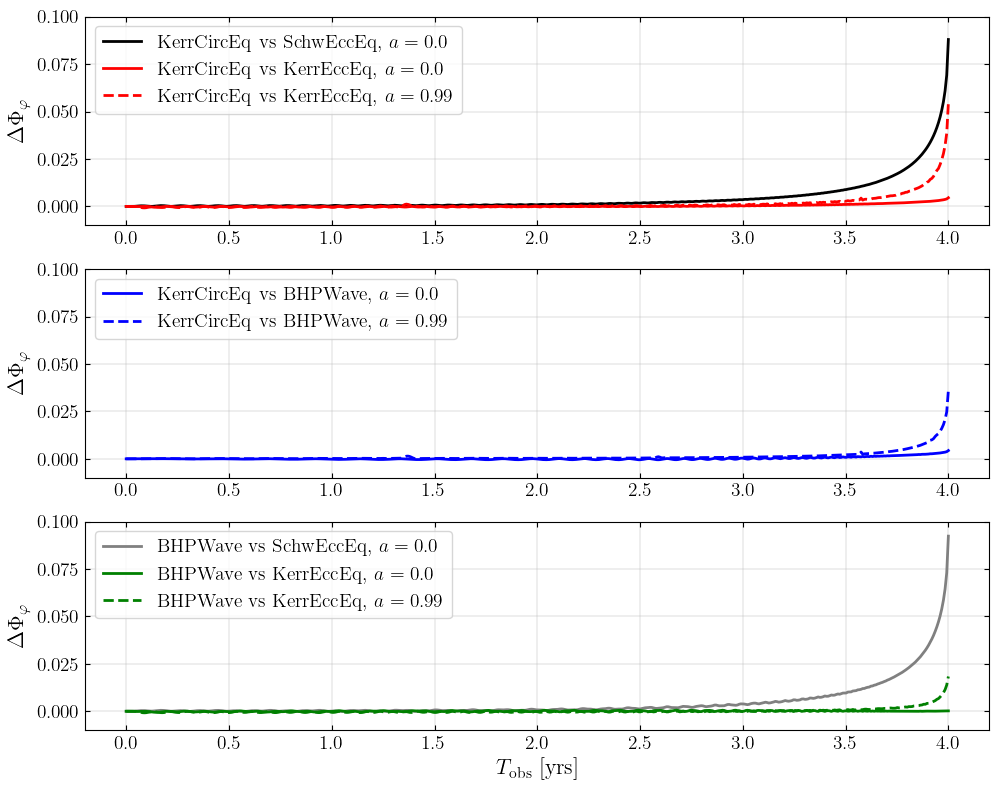

In [ ]:
title_fontsize = 20
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
thickness = 2




fig, axes = plt.subplots(3, 1, figsize=(10, 8))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax1.plot(t_plot, δϕH_Fnew , '-k', label='KerrCircEq vs SchwEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax1.plot(t_plot, -δϕh_k , '-r', label='KerrCircEq vs KerrEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax1.plot(t_plot2, -δϕh_k99 , '--r', label='KerrCircEq vs KerrEccEq, $a = 0.99$', linewidth=thickness, rasterized=True)
ax1.grid()
ax1.set_ylabel(r'$\Delta \Phi_{\varphi}$', fontsize=label_fontsize)
# ax1.set_xlabel(r'$T_{\rm obs}$ [yrs]', fontsize=label_fontsize)
ax1.legend(fontsize=legend_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax1.set_ylim(-0.01, 0.1)

ax2.plot(t_plot, -δϕh_z , '-b', label='KerrCircEq vs BHPWave, $a = 0.0$', linewidth=thickness, rasterized=True)
ax2.plot(t_plot2, -δϕh_z99 , '--b', label='KerrCircEq vs BHPWave, $a = 0.99$', linewidth=thickness, rasterized=True)
ax2.grid()
ax2.set_ylabel(r'$\Delta \Phi_{\varphi}$', fontsize=label_fontsize)
# ax2.set_xlabel(r'$T_{\rm obs}$ [yrs]', fontsize=label_fontsize)
ax2.legend(fontsize=legend_fontsize, loc='upper left')
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax2.set_ylim(-0.01, 0.1)


ax3.plot(t_plot, -δϕz_Fnew , '-',color="grey", label='BHPWave vs SchwEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax3.plot(t_plot2, δϕz_k , '-g', label='BHPWave vs KerrEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax3.plot(t_plot2, δϕz_k99 , '--g', label='BHPWave vs KerrEccEq, $a = 0.99$', linewidth=thickness, rasterized=True)
ax3.grid()
ax3.set_ylabel(r'$\Delta \Phi_{\varphi}$', fontsize=label_fontsize)
ax3.set_xlabel(r'$T_{\rm obs}$ [yrs]', fontsize=label_fontsize)
ax3.legend(fontsize=legend_fontsize)
ax3.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax3.set_ylim(-0.01, 0.1)

plt.tight_layout()
# plt.savefig('Cross_codes_phase_shift.pdf')


## Waveform comparison

In [2]:
# import os
# # print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
import multiprocessing
num_threads =  multiprocessing.cpu_count()
print(f"Number of threads: {num_threads}")
import few
for backend in ["cpu", "cuda11x", "cuda12x", "cuda", "gpu"]:
    print(f" - Backend '{backend}': {'available' if few.has_backend(backend) else 'unavailable'}")


Number of threads: 96
 - Backend 'cpu': available
 - Backend 'cuda11x': unavailable
 - Backend 'cuda12x': available
 - Backend 'cuda': available
 - Backend 'gpu': available


In [3]:
import numpy as np
from matplotlib import pyplot as plt

import few
# cfg_set = few.get_config_setter(reset=True)
# # cfg_set.enable_backends("cpu")
# cfg_set.enable_backends("cuda12x", "cpu")
from few.waveform import GenerateEMRIWaveform, FastKerrEccentricEquatorialFlux
from few.utils.fdutils import GetFDWaveformFromFD, GetFDWaveformFromTD
from few.trajectory.inspiral import EMRIInspiral
from few.trajectory.ode.flux import KerrEccEqFlux
from few.utils.constants import YRSID_SI, MTSUN_SI
from few.utils.utility import get_mismatch



Kerr_ecc_wave = FastKerrEccentricEquatorialFlux()


from bhpwave.waveform import KerrWaveform
from  bhpwave.trajectory.inspiral import InspiralGenerator
from bhpwave.waveform import scaled_amplitude
import multiprocessing
Zach_gen_Kerr = KerrWaveform()
num_threads_BHPWave = multiprocessing.cpu_count()
traj_BHPWave = InspiralGenerator(trajectory_data=None)
print("num_threads_BHPWave:", num_threads_BHPWave, "num_threads:", num_threads)



num_threads_BHPWave: 96 num_threads: 96


#### One year long waves:

In [7]:
# ####### Loading the saved data from KerrCir version of FEW ---> https://github.com/Hassankh92/FastEMRIWaveforms_KerrCircNonvac
# ###### Download the data from :
# #  https://perimeter-my.sharepoint.com/:f:/g/personal/hkhalvati_perimeterinstitute_ca/EpClG00fwZVNsch7WU2OrGQBdtY8cctLCEdKmemo2S7fZw?e=KbP3cX

# KerrCirc_wave_path = "/mnt/beegfs/hkhalvati/data_for_KerrEcc_comparison/"
# import h5py
# import os

# # file_list = os.listdir(KerrCirc_wave_path)

# file1 = "Kerr_wave_l10_a0.99_p6.858176_T1_dt2_newmass.h5"#file_list[0]
# with h5py.File(KerrCirc_wave_path + file1, "r") as f:
#     print(f.keys())
#     print(f.attrs.keys())
#     att_list = list(f.attrs.keys())
#     for att in att_list:
#         print(att, f.attrs[att])
#     wave_KerrCirc_lmax10 = f["Kerr_wave"][:]
#     M = f.attrs["M"]
#     mu = f.attrs["mu"]
#     a0 = f.attrs["a0"]
#     p0 = f.attrs["p0"]
#     T_obs = f.attrs["T_obs"]
#     theta = f.attrs["theta"]
#     phi = f.attrs["phi"]

# dt = 2.0
# e0 = 0.0
# x0 = 1.0
# dist = 1.0
# Phi_phi0 = 0.0



# MM = M+mu
# mumu = M*mu/(M+mu) # for the new mass convention in the KerrEccentric


# zach_scaled_amp = scaled_amplitude(mumu, dist)
# Zach_source = zach_scaled_amp * Zach_gen_Kerr.source_frame(MM, mumu, a0, p0, theta, phi, Phi_phi0 , dt=dt, T = T_obs)# ,mode_selection=specific_modes,  num_threads=num_threads_BHPWave)



# waveform_KerrEcc = Kerr_ecc_wave(M, mu, a0, p0, e0, x0, theta, phi,dt=dt, T=T_obs, dist = dist,eps = 1e-16)
# waveform_KerrEcc = waveform_KerrEcc.get()
# print("number of modes kept:",Kerr_ecc_wave.num_modes_kept)


# mis_BHPWave_kerrecc = get_mismatch(Zach_source, waveform_KerrEcc, use_gpu=True)
# mis_kerrcir10_kerrecc = get_mismatch(wave_KerrCirc_lmax10, waveform_KerrEcc, use_gpu=True)
# mis_kerrcirc10_BHPWave = get_mismatch(wave_KerrCirc_lmax10, Zach_source, use_gpu=True)
# print("mismatch with KerrCirc l=10:", mis_kerrcirc10_BHPWave)
# print("mismatch with BHPWave:", mis_BHPWave_kerrecc)
# print("mismatch with KerrCirc l=10:", mis_kerrcir10_kerrecc)


# t_arr = np.arange(len(waveform_KerrEcc.real))*dt # in seconds
# print(f"len of waveforms: KerrEcc: {len(waveform_KerrEcc)}, KerrCirc: {len(wave_KerrCirc_lmax10)}, BHPWave: {len(Zach_source)}")




# title_fontsize = 20
# label_fontsize = 16
# tick_fontsize = 14
# legend_fontsize = 14
# text_fontsize = 12


# fig, axes = plt.subplots(1, 2, figsize=(14, 4.5))

# # First subplot
# axes[0].plot(t_arr[:8000], waveform_KerrEcc[:8000].real, '-k', label='KerrEccEq, a = 0.99')
# axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax10[:8000].real, '--r', label='KerrCircEq, a = 0.99, lmax=10')
# axes[0].plot(t_arr[:8000], Zach_source[:8000].real, ':g', label='BHPWAVE, a = 0.99')
# # axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax15[:8000].real, '-g', label='KerrCircEq, a = 0.99, lmax=15')
# axes[0].set_xlabel('t [s]', fontsize=label_fontsize)
# axes[0].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
# axes[0].set_ylim(-6e-22, 6e-22)
# # axes[0].set_title("Beginning of wave", fontsize=title_fontsize)
# axes[0].legend(fontsize=legend_fontsize)
# axes[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
# axes[0].grid(True)

# # Second subplot
# axes[1].plot(t_arr[-500:], waveform_KerrEcc[-500:].real, '-k', label='Relativistic circular Kerr ')
# axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax10[-500:].real, '--r', label='KerrCircEq, lmax=10')
# axes[1].plot(t_arr[-500:], Zach_source[-500:].real, ':g', label='BHPWAVE')
# # axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax15[-500:].real, '-g', label='KerrCircEq, lmax=15')
# axes[1].set_xlabel('t [s]', fontsize=label_fontsize)
# # axes[1].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
# axes[1].set_ylim(-6e-22, 6e-22)
# # axes[1].set_title("End of wave", fontsize=title_fontsize)
# # axes[1].legend(fontsize=legend_fontsize)
# axes[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
# axes[1].tick_params(axis='y', left=False, labelleft=False)

# axes[1].grid(True)

# textstr = f"mismatch with BHPWave: ${mis_BHPWave_kerrecc:.2e}$"
# textstr += f"\nmismatch with KerrCirc lmax=10: ${mis_kerrcir10_kerrecc:.2e}$"
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# axes[0].text(0.05, 0.05, textstr, transform=axes[0].transAxes, fontsize=text_fontsize,
#              verticalalignment='bottom', bbox=props)

# fig.suptitle(f"Waveforms comparison for {T_obs:.1f} year long inspiral", fontsize=title_fontsize, y=0.94)


# plt.tight_layout()

# # plt.savefig(f"waveforms_comparison_Tobs{T_obs}.pdf")


<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'T_obs', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
T_obs 4.0
a0 0.99
mu 10.0
p0 10.031411
phi 1.0471975511965976
theta 0.6283185307179586
number of modes kept: 22
mismatch with BHPWave: 2.1726562963619855e-05
mismatch with KerrCirc l=10: 0.00415775082459835
len of waveforms: KerrEcc: 63116300, KerrCirc: 63116300, BHPWave: 63116300


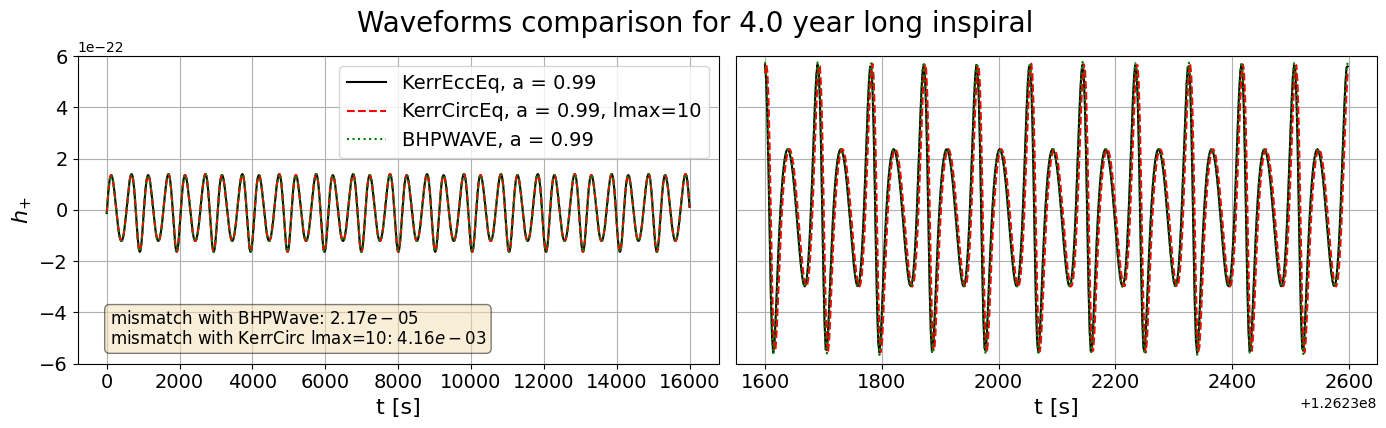

In [8]:
####### Loading the saved data from KerrCir version of FEW ---> https://github.com/Hassankh92/FastEMRIWaveforms_KerrCircNonvac
###### Download the data from :
#  https://perimeter-my.sharepoint.com/:f:/g/personal/hkhalvati_perimeterinstitute_ca/EpClG00fwZVNsch7WU2OrGQBdtY8cctLCEdKmemo2S7fZw?e=KbP3cX

KerrCirc_wave_path = "/mnt/beegfs/hkhalvati/data_for_KerrEcc_comparison/"
import h5py
import os

file1 = "Kerr_wave_l10_a0.99_p10.031411_T4_dt2_V2_newmass.h5"   
with h5py.File(KerrCirc_wave_path + file1, "r") as f:
    print(f.keys())
    print(f.attrs.keys())
    att_list = list(f.attrs.keys())
    for att in att_list:
        print(att, f.attrs[att])
    wave_KerrCirc_lmax10 = f["Kerr_wave"][:]
    M = f.attrs["M"]
    mu = f.attrs["mu"]
    a0 = f.attrs["a0"]
    p0 = f.attrs["p0"]
    T_obs = f.attrs["T_obs"]
    theta = f.attrs["theta"]
    phi = f.attrs["phi"]

dt = 2.0
e0 = 0.0
x0 = 1.0
dist = 1.0
Phi_phi0 = 0.0




mumu = M*mu/(M+mu) # for the new mass convention in the KerrEccentric
MM = M+mu

zach_scaled_amp = scaled_amplitude(mu, dist)
Zach_source = zach_scaled_amp * Zach_gen_Kerr.source_frame(MM, mumu, a0, p0, theta, phi, Phi_phi0 , dt=dt, T = T_obs)# ,mode_selection=specific_modes,  num_threads=num_threads_BHPWave)



waveform_KerrEcc = Kerr_ecc_wave(M, mu, a0, p0, e0, x0, theta, phi,dt=dt, T=T_obs, dist = dist,eps = 1e-16)
waveform_KerrEcc = waveform_KerrEcc.get()
print("number of modes kept:",Kerr_ecc_wave.num_modes_kept)


mis_BHPWave_kerrecc = get_mismatch(Zach_source, waveform_KerrEcc, use_gpu=True)
mis_kerrcir10_kerrecc = get_mismatch(wave_KerrCirc_lmax10, waveform_KerrEcc, use_gpu=True)
print("mismatch with BHPWave:", mis_BHPWave_kerrecc)
print("mismatch with KerrCirc l=10:", mis_kerrcir10_kerrecc)


t_arr = np.arange(len(waveform_KerrEcc.real))*dt # in seconds
print(f"len of waveforms: KerrEcc: {len(waveform_KerrEcc)}, KerrCirc: {len(wave_KerrCirc_lmax10)}, BHPWave: {len(Zach_source)}")




title_fontsize = 20
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
text_fontsize = 12


fig, axes = plt.subplots(1, 2, figsize=(14, 4.5))

# First subplot
axes[0].plot(t_arr[:8000], waveform_KerrEcc[:8000].real, '-k', label='KerrEccEq, a = 0.99',rasterized=True)
axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax10[:8000].real, '--r', label='KerrCircEq, a = 0.99, lmax=10',rasterized=True)
axes[0].plot(t_arr[:8000], Zach_source[:8000].real, ':g', label='BHPWAVE, a = 0.99',rasterized=True)
# axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax15[:8000].real, '-g', label='KerrCircEq, a = 0.99, lmax=15')
axes[0].set_xlabel('t [s]', fontsize=label_fontsize)
axes[0].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
axes[0].set_ylim(-6e-22, 6e-22)
# axes[0].set_title("Beginning of wave", fontsize=title_fontsize)
axes[0].legend(fontsize=legend_fontsize)
axes[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[0].grid(True)

# Second subplot
axes[1].plot(t_arr[-500:], waveform_KerrEcc[-500:].real, '-k', label='Relativistic circular Kerr ',rasterized=True)
axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax10[-500:].real, '--r', label='KerrCircEq, lmax=10',rasterized=True)
axes[1].plot(t_arr[-500:], Zach_source[-500:].real, ':g', label='BHPWAVE',rasterized=True)
# axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax15[-500:].real, '-g', label='KerrCircEq, lmax=15')
axes[1].set_xlabel('t [s]', fontsize=label_fontsize)
# axes[1].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
axes[1].set_ylim(-6e-22, 6e-22)
# axes[1].set_title("End of wave", fontsize=title_fontsize)
# axes[1].legend(fontsize=legend_fontsize)
axes[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', left=False, labelleft=False)

axes[1].grid(True)

textstr = f"mismatch with BHPWave: ${mis_BHPWave_kerrecc:.2e}$"
textstr += f"\nmismatch with KerrCirc lmax=10: ${mis_kerrcir10_kerrecc:.2e}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes[0].text(0.05, 0.05, textstr, transform=axes[0].transAxes, fontsize=text_fontsize,
             verticalalignment='bottom', bbox=props)

fig.suptitle(f"Waveforms comparison for {T_obs:.1f} year long inspiral", fontsize=title_fontsize, y=0.94)


plt.tight_layout()

# plt.savefig(f"waveforms_comparison_Tobs{T_obs}.pdf")


In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import h5py


import numpy as np
from matplotlib import pyplot as plt

import few
# cfg_set = few.get_config_setter(reset=True)
# # cfg_set.enable_backends("cpu")
# cfg_set.enable_backends("cuda12x", "cpu")
from few.waveform import GenerateEMRIWaveform, FastKerrEccentricEquatorialFlux
from few.utils.fdutils import GetFDWaveformFromFD, GetFDWaveformFromTD
from few.trajectory.inspiral import EMRIInspiral
from few.trajectory.ode.flux import KerrEccEqFlux
from few.utils.constants import YRSID_SI, MTSUN_SI
from few.utils.utility import get_mismatch
import multiprocessing
num_threads =  multiprocessing.cpu_count()


Kerr_ecc_wave = FastKerrEccentricEquatorialFlux()


from bhpwave.waveform import KerrWaveform
from  bhpwave.trajectory.inspiral import InspiralGenerator
from bhpwave.waveform import scaled_amplitude
import multiprocessing
Zach_gen_Kerr = KerrWaveform()
num_threads_BHPWave = multiprocessing.cpu_count()
traj_BHPWave = InspiralGenerator(trajectory_data=None)
print("num_threads_BHPWave:", num_threads_BHPWave, "num_threads:", num_threads)




num_threads_BHPWave: 96 num_threads: 96


<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'T_obs', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
T_obs 4.0
a0 0.99
mu 10.0
p0 10.031411
phi 1.0471975511965976
theta 0.6283185307179586
number of modes kept: 22
mismatch with BHPWave: 2.1726562963619855e-05
mismatch with KerrCirc l=10: 0.00415775082459835
len of waveforms: KerrEcc: 63116300, KerrCirc: 63116300, BHPWave: 63116300
<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'T_obs', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
T_obs 4.0
a0 0.5
mu 10.0
p0 11.033097
phi 1.0471975511965976
theta 0.6283185307179586
number of modes kept: 14
mismatch with BHPWave: 1.1184909427530698e-06
mismatch with KerrCirc l=10: 0.0005989487999139564
len of waveforms: KerrEcc: 63116300, KerrCirc: 63116300, BHPWave: 63116300
<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'T_obs', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
T_obs 4.0
a0 -0.99
mu 10.0
p0 14.044501
phi 1.0471975511965976
theta 0.6283185307179586
number of modes kept: 10
mismatc

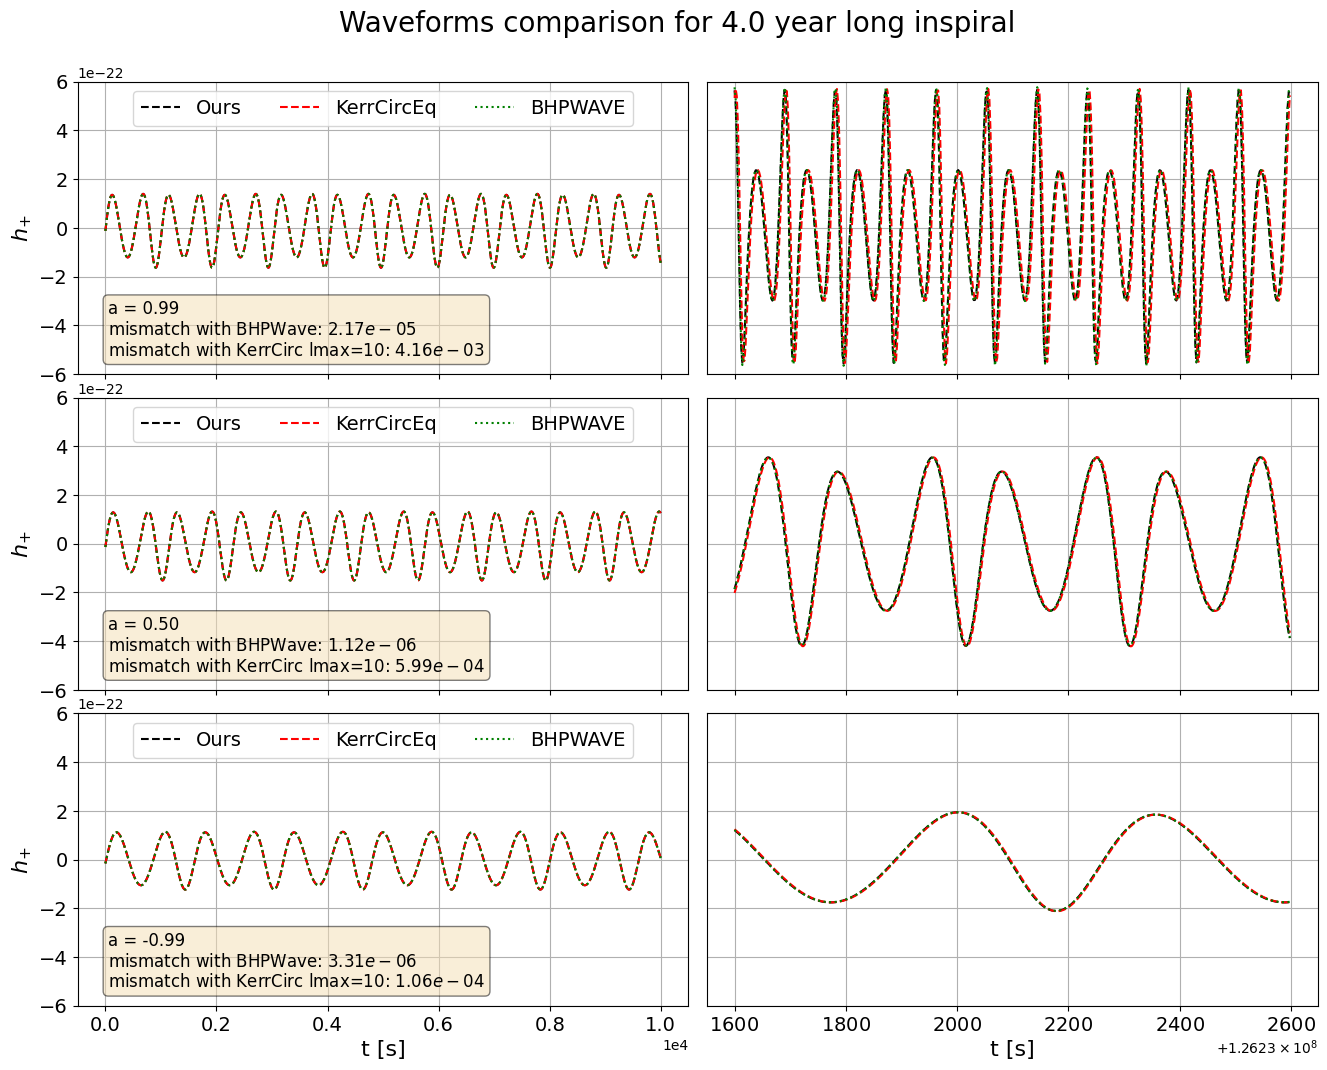

In [ ]:



import matplotlib.ticker as ticker
KerrCirc_wave_path = "/mnt/beegfs/hkhalvati/data_for_KerrEcc_comparison/"
dir_list = os.listdir(KerrCirc_wave_path)

sorted_files = sorted( [f for f in dir_list if f.startswith("Kerr_wave_")], 
                      key=lambda x: float(x.split("_")[3].split("a")[1]), reverse=True)  

dt = 2.0
e0 = 0.0
x0 = 1.0
dist = 1.0
Phi_phi0 = 0.0






fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for ii, f0 in enumerate(sorted_files):
    with h5py.File(KerrCirc_wave_path + f0, "r") as f:
        print(f.keys())
        print(f.attrs.keys())
        att_list = list(f.attrs.keys())
        for att in att_list:
            print(att, f.attrs[att])
        wave_KerrCirc_lmax10 = f["Kerr_wave"][:]
        M = f.attrs["M"]
        mu = f.attrs["mu"]
        a0 = f.attrs["a0"]
        p0 = f.attrs["p0"]
        T_obs = f.attrs["T_obs"]
        theta = f.attrs["theta"]
        phi = f.attrs["phi"]
    MM = M+mu
    mumu = M*mu/(M+mu) # for the new mass convention in the KerrEccentric
    zach_scaled_amp = scaled_amplitude(mu, dist)
    Zach_source = zach_scaled_amp * Zach_gen_Kerr.source_frame(MM, mumu, a0, p0, theta, phi, Phi_phi0 , dt=dt, T = T_obs)# ,mode_selection=specific_modes,  num_threads=num_threads_BHPWave)
    waveform_KerrEcc = Kerr_ecc_wave(M, mu, a0, p0, e0, x0, theta, phi,dt=dt, T=T_obs, dist = dist,eps = 1e-16)
    waveform_KerrEcc = waveform_KerrEcc.get()
    print("number of modes kept:",Kerr_ecc_wave.num_modes_kept)

    mis_BHPWave_kerrecc = get_mismatch(Zach_source, waveform_KerrEcc, use_gpu=True)
    mis_kerrcir10_kerrecc = get_mismatch(wave_KerrCirc_lmax10, waveform_KerrEcc, use_gpu=True)
    print("mismatch with BHPWave:", mis_BHPWave_kerrecc)
    print("mismatch with KerrCirc l=10:", mis_kerrcir10_kerrecc)

    t_arr = np.arange(len(waveform_KerrEcc.real))*dt # in seconds
    print(f"len of waveforms: KerrEcc: {len(waveform_KerrEcc)}, KerrCirc: {len(wave_KerrCirc_lmax10)}, BHPWave: {len(Zach_source)}")

    title_fontsize = 20
    label_fontsize = 16
    tick_fontsize = 14
    legend_fontsize = 14
    text_fontsize = 12

    # First subplot
    time_interval_secs1 = 10000 #seconds
    time_interval_secs1 = int(time_interval_secs1/dt)
    axes[ii,0].plot(t_arr[:time_interval_secs1], waveform_KerrEcc[:time_interval_secs1].real, '--k', label=f'Ours', rasterized=True)
    axes[ii,0].plot(t_arr[:time_interval_secs1], wave_KerrCirc_lmax10[:time_interval_secs1].real, '--r', label=f'KerrCircEq', rasterized=True)
    axes[ii,0].plot(t_arr[:time_interval_secs1], Zach_source[:time_interval_secs1].real, ':g', label=f'BHPWAVE', rasterized=True)
    axes[ii, 0].ticklabel_format(axis='x', style='sci', scilimits=(4, 4))
    if ii==2:    
        axes[ii,0].set_xlabel('t [s]', fontsize=label_fontsize)
    axes[ii,0].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
    axes[ii,0].set_ylim(-6e-22, 6e-22)
    axes[ii,0].legend(fontsize=legend_fontsize, loc='upper center', ncol=3)
    axes[ii,0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axes[ii,0].grid(True)
    # Second subplot
    time_interval_secs = 1000 #seconds
    time_interval_secs = int(time_interval_secs/dt)
    axes[ii,1].plot(t_arr[-time_interval_secs:], waveform_KerrEcc[-time_interval_secs:].real, '--k', rasterized=True)
    axes[ii,1].plot( t_arr[-time_interval_secs:], wave_KerrCirc_lmax10[-time_interval_secs:].real, '--r', rasterized=True)
    axes[ii,1].plot(t_arr[-time_interval_secs:], Zach_source[-time_interval_secs:].real, ':g', rasterized=True)
    formatter = ticker.ScalarFormatter(useOffset=True)
    formatter.set_useMathText(True)
    formatter.set_powerlimits((-6, 6))  # force offset style within this range
    axes[ii,1].xaxis.set_major_formatter(formatter)
    if ii == 2:
        axes[ii,1].set_xlabel('t [s]', fontsize=label_fontsize)
    axes[ii,1].set_ylim(-6e-22, 6e-22)
    axes[ii,1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axes[ii,1].tick_params(axis='y', left=False, labelleft=False)
    axes[ii,1].grid(True)
    textstr = f"a = {a0:.2f}\n"
    textstr += f"mismatch with BHPWave: ${mis_BHPWave_kerrecc:.2e}$\n"
    textstr += f"mismatch with KerrCirc lmax=10: ${mis_kerrcir10_kerrecc:.2e}$"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[ii,0].text(0.05, 0.05, textstr, transform=axes[ii,0].transAxes, fontsize=text_fontsize,
                verticalalignment='bottom', bbox=props)
    # textstr_a_value = f"{a0:.2f}"
    # axes[ii,1].text(0.05, 0.05, textstr_a_value, transform=axes[ii,1].transAxes, fontsize=text_fontsize, verticalalignment='bottom', bbox=props)
    if ii !=2:
        axes[ii,0].set_xticklabels([])
        axes[ii,1].set_xticklabels([])
    # fig.suptitle(f"Waveforms comparison for {T_obs:.1f} year long inspiral", fontsize=title_fontsize, y=0.94)
    fig.subplots_adjust(hspace=0.08, wspace=0.03)




In [2]:
#         :type select_modes: list[tuple(double)] or ndarray[tuple(double)], optional
import os
import numpy as np
from matplotlib import pyplot as plt
import h5py


import numpy as np
from matplotlib import pyplot as plt

import multiprocessing
num_threads =  multiprocessing.cpu_count()

from few.utils.utility import get_mismatch



from bhpwave.waveform import KerrWaveform
from  bhpwave.trajectory.inspiral import InspiralGenerator
from bhpwave.waveform import scaled_amplitude
import multiprocessing
Zach_gen_Kerr = KerrWaveform()
num_threads_BHPWave = multiprocessing.cpu_count()
traj_BHPWave = InspiralGenerator(trajectory_data=None)
print("num_threads_BHPWave:", num_threads_BHPWave, "num_threads:", num_threads)


# M = 1e6
# mu = 1e1
# a0 = 0.99    # non-rotating case
# dt = 40.0 # this is to have less number of point for Zach's traj
# T_obs = 4.0
# e0 = 0.0
# Y0 = 1.0
# x0 = 1.0
# p0 = 11.0
# Phi_phi0 = 0.0

# phi =  1.0471975511965976
# theta =  0.6283185307179586



KerrCirc_wave_path = "/mnt/beegfs/hkhalvati/data_for_KerrEcc_comparison/vs_spin_waveform_full_newmass/"
import h5py
import os

file1 = "Kerr_wave_l10_a0.99_p10.031411_T4_dt10.h5"   
with h5py.File(KerrCirc_wave_path + file1, "r") as f:
    print(f.keys())
    print(f.attrs.keys())
    att_list = list(f.attrs.keys())
    for att in att_list:
        print(att, f.attrs[att])
    wave_KerrCirc_lmax10 = f["Kerr_wave"][:]
    M = f.attrs["M"]
    mu = f.attrs["mu"]
    a0 = f.attrs["a0"]
    p0 = f.attrs["p0"]
    T_obs = f.attrs["T_obs"]
    theta = f.attrs["theta"]
    phi = f.attrs["phi"]

dt = 10.0
e0 = 0.0
x0 = 1.0
dist = 1.0
Phi_phi0 = 0.0



mumu = M*mu/(M+mu) # for the new mass convention in the KerrEccentric
MM = M+mu






# select_modes = []
# lmax = 10
# for l in range(2, lmax+1):
#     for m in range(0, l+1):
#         select_modes.append((l, m))
# # print("select_modes:", select_modes)

zach_scaled_amp = scaled_amplitude(mumu, dist)
Zach_source =  zach_scaled_amp * Zach_gen_Kerr.source_frame(MM, mumu, a0, p0, theta, phi, Phi_phi0 , dt=dt, T = T_obs)#, select_modes=select_modes,  num_threads=num_threads_BHPWave)

mis0 = get_mismatch(Zach_source, wave_KerrCirc_lmax10, use_gpu=True)
print("mismatch with KerrCirc l=10:", mis0)


num_threads_BHPWave: 96 num_threads: 96
<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'T_obs', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
T_obs 4.0
a0 0.99
mu 10.0
p0 10.031411
phi 1.0471975511965976
theta 0.6283185307179586
mismatch with KerrCirc l=10: 0.0036127499979256017
